<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 5

## Introduction:

In this lab, we will carefully explore Bayesian reasoning using something called the "Numbers Game", a thought experiment from Josh Tenenbaum's PhD thesis.  You will implement a version of the numbers game, which will involve priors, likelihoods, posteriors, and posterior predictives.

See Ch 4.6 for the necessary Bayesian background.

[The numbers game is described in detail in this PDF](https://wingated.github.io/cs473/pdfs/numbers_game.pdf). NOTE that you only need up to section 2.5 (pg. 7), not the whole thing!

For this lab, your notebook should perform the following functions:

* Prompt the user for a set of numbers. (What happens if they only enter one number?)
* Display the prior, likelihood, and posterior for each concept
* Print the most likely concept
* Print the posterior predictive distribution over numbers

When you display your prior, likelihood, and posterior, your figure should look something like the ones in the book; my version is shown here:

![figure 1](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image1.png)

Similarly, when you display the posterior predictive, your figure should look something like this:

![figure 2](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image2.png)

---
## Grading standards   

Your notebook will be graded on the following:

* 10% Correctly formed & normalized prior
* 20% Correctly formed likelihood
* 30% Correctly formed & normalized posterior
* 30% Correctly formed & normalized posterior predictive
* 10% tidy and legible figures, including labeled axes

Remember: correct normalization may mean different things for different distributions!

---
## Description

Following the Bayesian Concept Learning example in the PDF, we're interested in reasoning about the origin of a set of numbers. We'll do this by placing a prior over a set of possible concepts (or “candidate origins”), and then use Bayes' law to construct a posterior distribution over concepts given some data.

For this lab, we will only consider numbers between 0 and 100, inclusive.

Your notebook should construct a set of possible number-game concepts (such as “even” or “odd”). These can be any set of concepts you want, but should include at least all of the concepts in the book (see, for example, Fig. 3.2). You must assign a prior probability to each concept.

To make grading easier on our incredible TA, your notebook should construct a set of possible number-game concepts that are the same as the concepts in in the image at the beginning of this notebook. You must assign a prior probability to each concept; to make grading easier, your prior should be:

```python
prior = numpy.ones(len(concepts))
prior[0] = 5
prior[1] = 5
prior[30] = .01
prior[31] = .01
prior = prior / numpy.sum(prior)
```

This prior distribution is $p(h)$.

You must then prompt the user for some data. This will just be a sequence of numbers, like 16, 2,4,6 or 4,9,25. This is *data*. You must then compute the likelihood of the *data*, given the hypothesis: $p(data|h)$.

**Important:** you can assume that each number in the data was sampled **independently**, and that each number was sampled **uniformly** from the set of all possible numbers *in that concept*.

*Hint: what does that imply about the probability of sampling a given number from a concept with lots of possibilities, such as the all concept, vs. a concept with few possibilities, such as multiples of 10?*

Prepare a figure, as described in the Deliverable that illustrates your prior, the likelihood of the data for each concept, the posterior. Note: distributions should be properly normalized.

You must also prepare a figure showing the posterior predictive distribution. This distribution describes the probability that a number *x* is in the target concept (which we'll call *C*), given the data. (Note that we're drawing a subtle distinction between the true concept and a hypothesis). The book is somewhat unclear on this, but to do this, we marginalize out the specific hypothesis:

![equations](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image3.png)

We've already computed the posterior $p(h|data)$, so we're only left with the term $p(\tilde{x} \in C|h)$. For this, just use an **indicator** function that returns 1 if $\tilde{x}$ is in **h**, and 0 otherwise.


*Hint: just like any other distribution, the posterior predictive is normalized - but it is not normalized as a function of $\tilde{x}$. So what is it normalized over?*


---
## Hints

You may find the following functions useful:

Please enter a set of numbers (comma-separated): 16


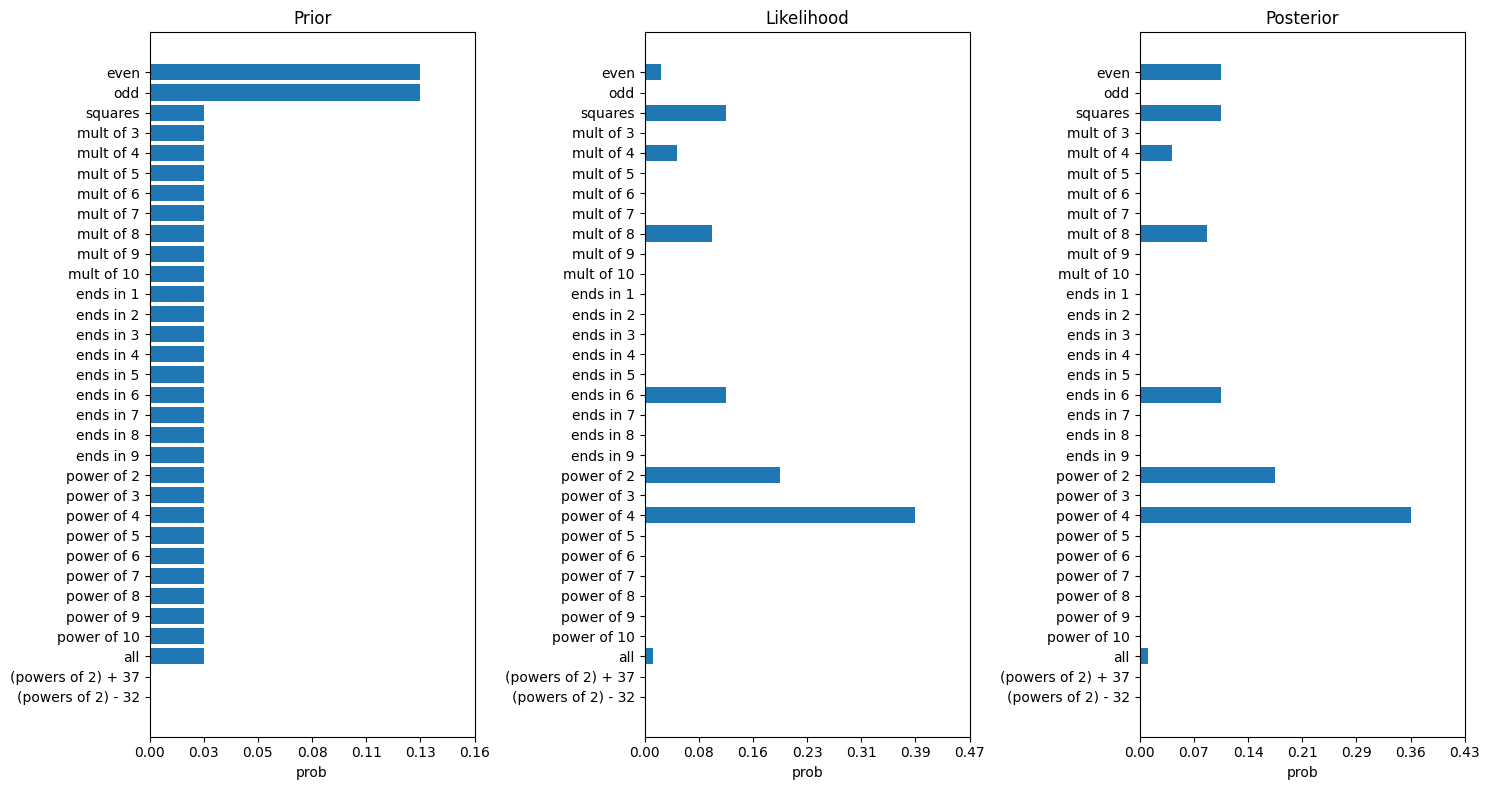

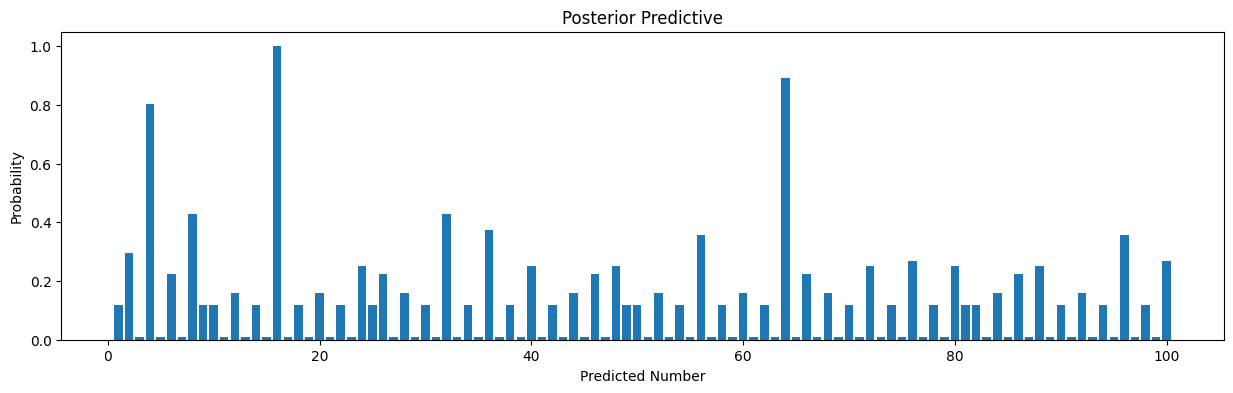

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import math

MAX_VALUE = 100
x_range = range(1, MAX_VALUE + 1)

concepts = [
    "even", "odd", "squares",
    *[f"mult of {k}" for k in range(3, 11)],
    *[f"ends in {d}" for d in range(1, 10)],
    *[f"power of {k}" for k in range(2, 11)],
    "all",
    "(powers of 2) + 37",
    "(powers of 2) - 32",
]


def is_concept_member(x, concept):
    if concept == "even": return (x % 2 == 0)
    if concept == "odd": return (x % 2 == 1)
    if concept == "squares": return ((int(math.sqrt(x))) ** 2 == x)
    if concept == "all": return True

    if concept.startswith("mult of "):
        k = int(concept.split()[-1])
        return x % k == 0

    if concept.startswith("ends in "):
        d = int(concept.split()[-1])
        return x % 10 == d

    if concept.startswith("power of "):
        base = int(concept.split()[-1])
        val = base
        while val <= x:
            if val == x: return True
            val *= base
        return False

    if concept == "(powers of 2) + 37":
        # Check if x - 37 is a power of 2
        y = x - 37
        return y > 0 and ((y & (y - 1)) == 0)

    if concept == "(powers of 2) - 32":
        # Check if x + 32 is a power of 2
        y = x + 32
        return y > 0 and ((y & (y - 1)) == 0)

    return False


concept_sizes = {c: sum(1 for x in x_range if is_concept_member(x, c)) for c in concepts}


def get_priors(concepts):
    prior = np.ones(len(concepts))

    prior[0] = 5
    prior[1] = 5
    prior[30] = .01
    prior[31] = .01

    return prior / np.sum(prior)


def get_likelihoods(concepts, data):
    likelihoods = []

    for c in concepts:
        if all(is_concept_member(x, c) for x in data):
          likelihoods.append((1 / concept_sizes[c]) ** n)
        else:
          likelihoods.append(0)

    return (np.array(likelihoods)/np.sum(likelihoods))


def get_posteriors(priors, likelihoods):
    unnormalized = priors * likelihoods
    return (unnormalized / unnormalized.sum())


def plot(plt, num, concepts, category, title):
  plt.subplot(1, 3, num)
  plt.barh(concepts[::-1], category[::-1])
  plt.title(title)
  plt.xlabel("prob")

  xmax = max(max(category), 1e-6)*1.2
  plt.xlim(0, xmax)

  ticks = np.linspace(0, xmax, 7)
  plt.xticks(ticks, [f"{t:.2f}" for t in ticks])


# ---------------------
# Main
# ---------------------
nums = input('Please enter a set of numbers (comma-separated): ')
data = [int(x.strip()) for x in nums.split(',')]
n = len(data)

# Compute distributions
priors = get_priors(concepts)
likelihoods = get_likelihoods(concepts, data)
posteriors = get_posteriors(priors, likelihoods)

plt.figure(42, figsize=(15, 8))
plt.clf()

plot(plt, 1, concepts, priors, "Prior")
plot(plt, 2, concepts, likelihoods, "Likelihood")
plot(plt, 3, concepts, posteriors, "Posterior")

plt.tight_layout()
plt.show()

print()

posterior_predictive = []

for x in x_range:
    prob = sum(p for c, p in zip(concepts, posteriors) if is_concept_member(x, c))
    posterior_predictive.append(prob)

plt.figure(figsize=(15, 4))
plt.bar(x_range, posterior_predictive)
plt.title("Posterior Predictive")
plt.xlabel("Predicted Number")
plt.ylabel("Probability")
plt.show()